# MINERIA DE DATOS - TUIA  
## Trabajo práctico N° 3
### Estudiante: Yañez, Mirian

### El siguiente trabajo se realiza con el conjunto de datos "CoffeeRatings.csv"

### Investigación sobre el tema:
Indagando un poco acerca del tema encontre este sitio web con la siguiente información:
https://primerocafe.com.mx/mundo-barista/10-virtudes-cafe-califican-cata/

Los atributos de un café dan voz a la historia que hay detrás de él: su especie, la tierra donde fue cultivado, sus condiciones de almacenamiento, su proceso de tueste. Esos elementos se conjugan para dar origen a un universo de sabor y aromas que se juzgan en una cata para determinar la calidad del grano. De acuerdo con los protocolos de catación de la Specialty Coffee Asociation, la calidad de un café se determina tras evaluar **10 categorías que pueden alcanzar un puntaje del 10 al 100**.
A partir de 80 puntos se considera café de especialidad. Abajo de esa cantidad se cataloga como café común o comercial.
Categorías a evaluar en una cata
1. Fragancia y aroma: Se evalúa en tres momentos: el olor del café molido fresco antes de añadir el agua (fragancia), el olor del café cuando se mezcla con agua (aroma) y el olor al romper la costra formada en la superficie con la cuchara de cata.
2. Sabor: Al sorber el café se califican principalmente las notas que aparecen entre la primera impresión olfativa y las que se perciben en el retrogusto final. Un truco para detectar la riqueza aromática es sorber la infusión tapándose la nariz. Después, ya con la nariz libre, se vuelve a dar un sorbo para notar mucho más sabor.
3. Retrogusto: Se trata de cuántos minutos o segundos permanece en la boca el sabor del café después de ser ingerido. Si su duración es fugaz o deja sensaciones desagradables se califica con un puntaje bajo.
4. Acidez: Evalúa la nitidez de la bebida. Por lo general recibe el calificativo de “brillante” cuando la calificación es positiva y de “agria” cuando es negativa. Se juzga que la acidez sea balanceada y tenga estos cuatro componentes: intensidad; jugosidad, relacionada con la salivación producida; dulzor, referente al tipo de acidez (limón, mandarina, naranja) y brillo, el cual es la sensación agradable en el paladar.
5. Cuerpo: Es la densidad de la bebida. Las sensaciones de peso y volumen que el café deja en la boca. Se identifica como intenso o ligero.
6. Balance: Es la combinación del sabor, regusto, acidez y cuerpo. La manera en que estos elementos crean una bebida armónica y compleja. Si presenta una escasa cantidad de los atributos esperados según su especie o tipo de tueste; o bien, si un sólo atributo resalta de manera exagerada, la bebida recibe una baja puntuación.
7. Dulzor: Es la percepción de la boca que deja la presencia de algunos carbohidratos que contiene el grano. Se analiza que la bebida no sea agria, astringente o amarga para obtener una alta calificación.
8. Limpieza: Es la falta de impresiones negativas en el café infusionado, desde el primer sorbo hasta el retrogusto final. Se reprueba la infusión que presenta sabores ajenos.
9. Uniformidad: Es la consistencia de las propiedades que se detectan con los sentidos a través de las distintas tazas que se prueban de la misma muestra. Se califica que los cafés de una misma variedad sean uniformes. Si tienen cualidades o dejan sensaciones muy diferentes obtienen pocos puntos.
10. Impresión general: Es la apreciación de cada catador sobre la bebida. La calificación global que otorga de acuerdo a qué tan agradable o desagradable le resultó la muestra que degustó. Un café que refleja las cualidades de su origen y tueste recibe una alta valoración.


### Instalo las dependencias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import plot_tree

### Carga del dataset

In [6]:
df = pd.read_csv('CoffeeRatings.csv', delimiter=';')

### Análisis del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

In [7]:
df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


### El conjunto de datos consta de 835 registros y 11 variables, con 10 de ellas siendo variables numéricas (de tipo int64) y 1 variable categórica (de tipo object).
### No hay valores nulos en ninguna de las variables

## Estadística descriptiva

In [12]:
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


## Matriz de correlación

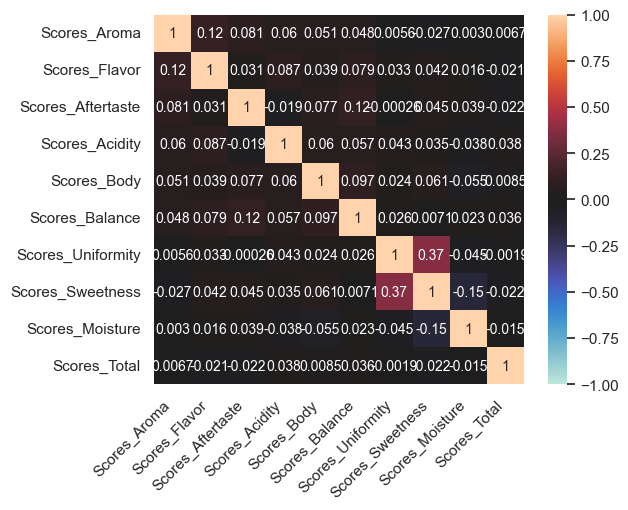

In [14]:
corr = df.drop(['Color'], axis=1).corr()
ax = sns.heatmap(
                corr,
                vmin=-1, vmax=1, center=0,
                square=True,
                annot = True,
                annot_kws = {'size': 10}
            )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Distribución de la variable Color

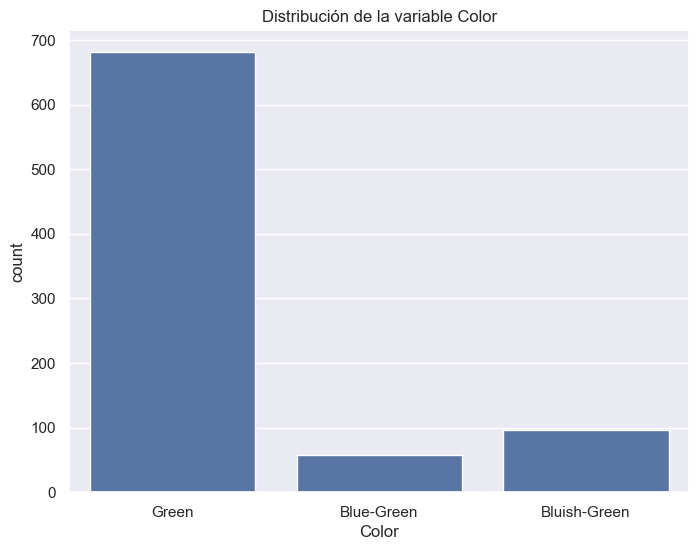

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Color', data=df)
plt.title('Distribución de la variable Color')
plt.show()

### Histogramas de variables numéricas

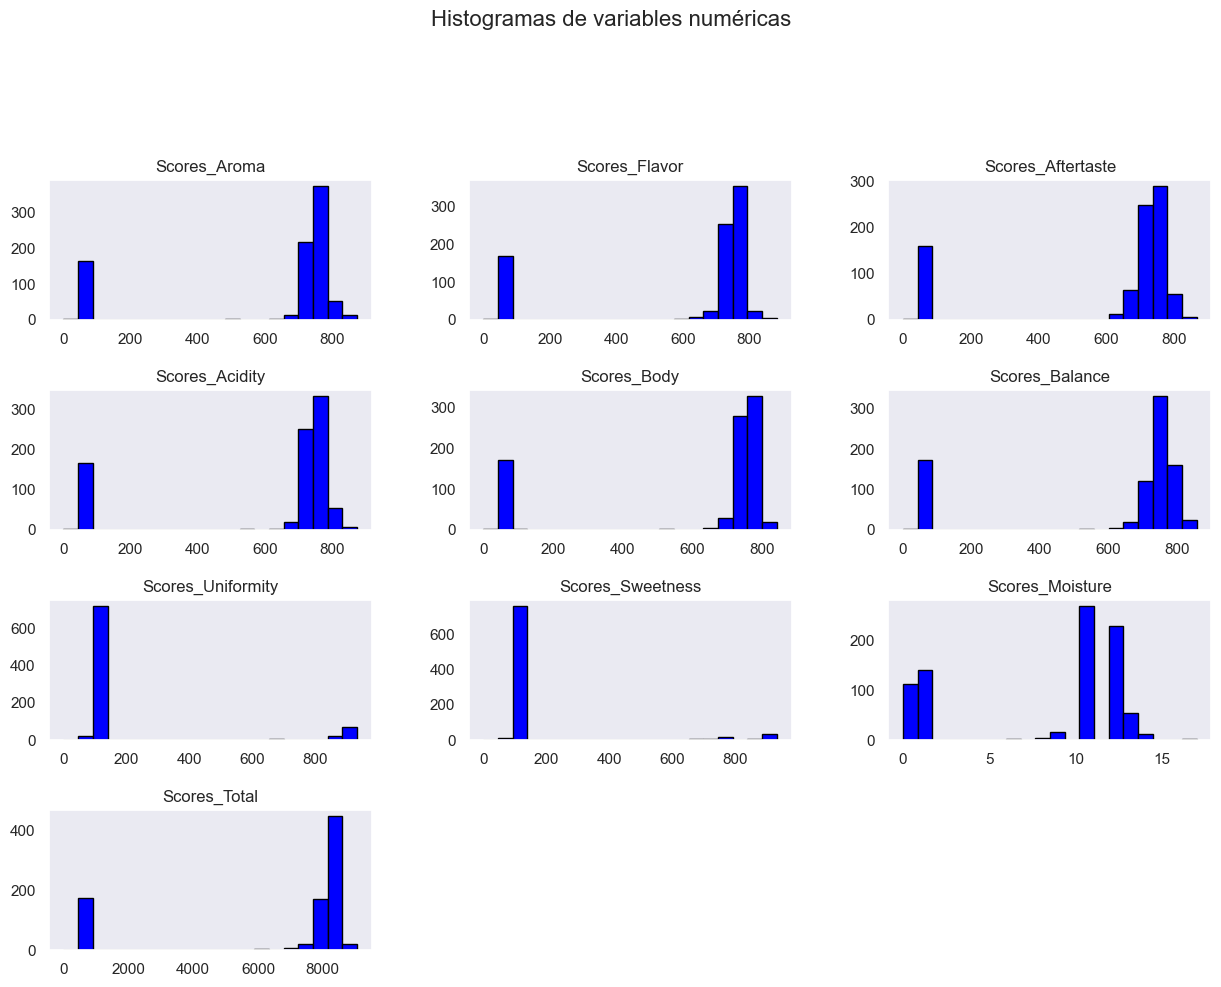

In [17]:
columnas_numericas = df.select_dtypes(include=['int64']).columns
df[columnas_numericas].hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black', grid=False)
plt.suptitle('Histogramas de variables numéricas', x=0.5, y=1.05, fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### Boxplot para visualizar outliers

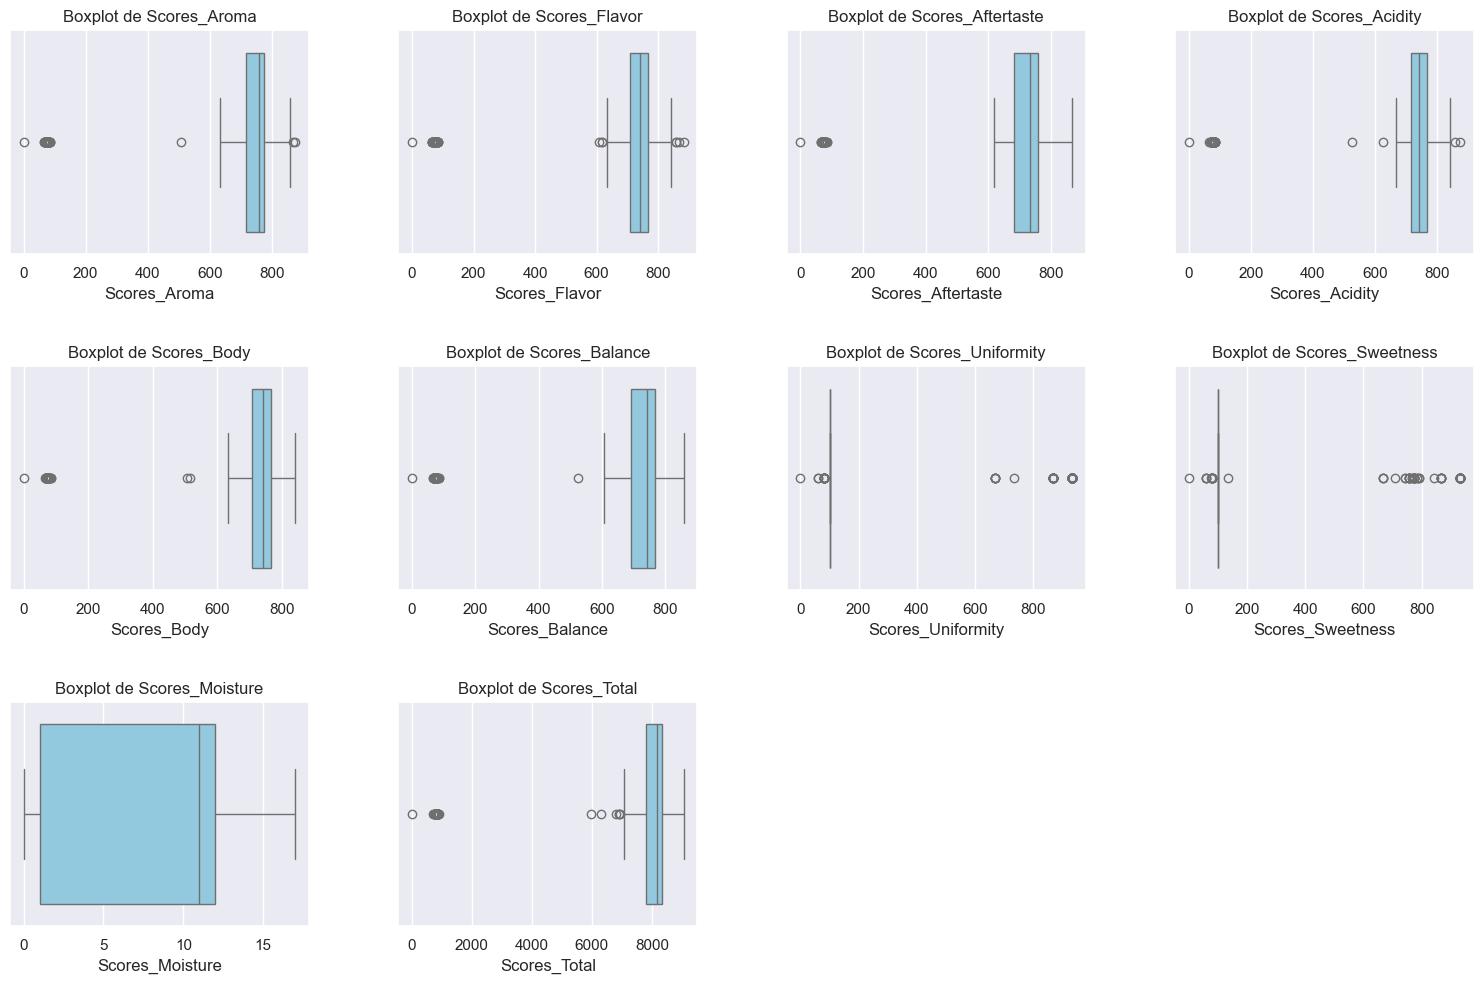

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columnas_numericas, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [20]:
import numpy as np
def detectar_outliers(data, threshold=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Iterar sobre las columnas numéricas y detectar outliers
for feature in columnas_numericas:
    outliers = detectar_outliers(df[feature])
    print(f"Valores atípicos en '{feature}':")
    print(df[feature][outliers])

Valores atípicos en 'Scores_Aroma':
0      85
1      85
3      80
4      80
5      80
       ..
819    75
820    75
824    75
832     0
834    75
Name: Scores_Aroma, Length: 168, dtype: int64
Valores atípicos en 'Scores_Flavor':
0      85
2      80
3      80
5      80
6      80
       ..
812    75
813    75
819    75
830    70
832     0
Name: Scores_Flavor, Length: 176, dtype: int64
Valores atípicos en 'Scores_Aftertaste':
0      80
1      80
2      80
3      80
7      75
       ..
792    75
795    75
823    75
826    70
832     0
Name: Scores_Aftertaste, Length: 160, dtype: int64
Valores atípicos en 'Scores_Acidity':
0      80
2      80
5      80
8      75
9      75
       ..
808    75
812    75
816    75
823    75
832     0
Name: Scores_Acidity, Length: 173, dtype: int64
Valores atípicos en 'Scores_Body':
0      80
1      80
4      80
5      75
7      75
       ..
824    75
829    75
830    70
832     0
834    75
Name: Scores_Body, Length: 176, dtype: int64
Valores atípicos en 'Score

In [22]:
# Ver la fila 832
fila_832 = df.iloc[832]

print("Fila 832 del DataFrame:")
print(fila_832)


Fila 832 del DataFrame:
Scores_Aroma             0
Scores_Flavor            0
Scores_Aftertaste        0
Scores_Acidity           0
Scores_Body              0
Scores_Balance           0
Scores_Uniformity        0
Scores_Sweetness         0
Scores_Moisture         12
Scores_Total             0
Color                Green
Name: 832, dtype: object
